## <center> <u> <b> 📍 📍 CREDIT RISK ANALYSIS  📍 📍</b> </u> </center>

#### <center>Objective: What are the different insights discovered from the dataset, which if implemented can lead to an increase in the percentage of succeeful loan applications.</center>

---

### `Table of Contents`

1. Exploratory Data Analysis
    - Loading the training and test datasets
    - Variable Identification and Typecasting
    - Plotting the variables of interest
    - Checking on the data distribution
    - Data Cleaning
2. Modeling
    - Scaling the datasets
    - Importing tensorflow and keras
    - Defining the Neural network model
    - Compiling the model
    - Training the model
    - Predicting loan status using the test dataset 
3. Conclusion
4. Recommendations

---

## <font color='black'> Loading the required libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from scipy.stats import pearsonr
from IPython.core.display import display, HTML
from numpy import cov
from numpy import std

## <font color='red'>1. Exploratory Data Analysis </font>

### Loading the credid risk training dataset

In [2]:
credit_risk_train_data = pd.read_csv('credit_risk_dataset_training.csv')

### Loading the credid risk testing dataset

In [3]:
test_data = pd.read_csv('credit_risk_dataset_test.csv')

##### Checking the shape of the dataset

In [4]:
print('The train dataset contains',credit_risk_train_data.shape[1], 'columns and',credit_risk_train_data.shape[0], 'observations')

print('The test dataset contains',test_data.shape[1], 'columns and',test_data.shape[0], 'observations. The test dataset is 30% of the total observations')

The train dataset contains 12 columns and 22850 observations
The test dataset contains 12 columns and 9731 observations. The test dataset is 30% of the total observations


##### Displaying the first five observations

In [5]:
credit_risk_train_data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          23          65500                  RENT                4.0   
3          21           9900                   OWN                2.0   
4          26          77100                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C      35000          15.23            1   
3     VENTURE          A       2500           7.14            1   
4   EDUCATION          B      35000          12.42            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.53                         N                           2  
3                 0.25                         N                           2  
4                 0.45                         N                           3

In [6]:
test_data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          25           9600              MORTGAGE                1.0   
1          24          54400                  RENT                8.0   
2          24          78956                  RENT                5.0   
3          26         108160                  RENT                4.0   
4          23          92111                  RENT                7.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0     MEDICAL          C       5500          12.87                 0.57   
1     MEDICAL          C      35000          14.27                 0.55   
2     MEDICAL          B      35000          11.11                 0.44   
3   EDUCATION          E      35000          18.39                 0.32   
4     MEDICAL          F      35000          20.25                 0.32   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                           3          NaN  
1                         Y                           4          NaN  
2                         N                           4          NaN  
3                         N                           4          NaN  
4                         N                           4          NaN

###### Displaying the last 5 observations

In [7]:
credit_risk_train_data.tail()

person_age  person_income person_home_ownership  person_emp_length  \
22845          52          65004                  RENT                4.0   
22846          57          53000              MORTGAGE                1.0   
22847          54         120000              MORTGAGE                4.0   
22848          56         150000              MORTGAGE                5.0   
22849          66          42000                  RENT                2.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
22845    PERSONAL          D      20000          15.58            1   
22846    PERSONAL          C       5800          13.16            0   
22847    PERSONAL          A      17625           7.49            0   
22848    PERSONAL          B      15000          11.48            0   
22849     MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
22845                 0.31                         Y   
22846                 0.11                         N   
22847                 0.15                         N   
22848                 0.10                         N   
22849                 0.15                         N   

       cb_person_cred_hist_length  
22845                          19  
22846                          30  
22847                          19  
22848                          26  
22849                          30

In [8]:
test_data.tail()

person_age  person_income person_home_ownership  person_emp_length  \
9726          52          30000                  RENT                6.0   
9727          60          49008                   OWN                5.0   
9728          60          45600                  RENT                1.0   
9729          52          64500                  RENT                0.0   
9730          65          76000                  RENT                3.0   

          loan_intent loan_grade  loan_amnt  loan_int_rate  \
9726          VENTURE          C       5000          12.73   
9727         PERSONAL          C      12000          13.79   
9728          VENTURE          B      20000          10.00   
9729        EDUCATION          B       5000          11.26   
9730  HOMEIMPROVEMENT          B      35000          10.99   

      loan_percent_income cb_person_default_on_file  \
9726                 0.17                         N   
9727                 0.24                         Y   
9728                 0.44                         N   
9729                 0.08                         N   
9730                 0.46                         N   

      cb_person_cred_hist_length  loan_status  
9726                          18          NaN  
9727                          21          NaN  
9728                          26          NaN  
9729                          20          NaN  
9730                          28          NaN

### Variable Identification and Typecasting

In [9]:
credit_risk_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22850 entries, 0 to 22849
Data columns (total 12 columns):
person_age                    22850 non-null int64
person_income                 22850 non-null int64
person_home_ownership         22850 non-null object
person_emp_length             22237 non-null float64
loan_intent                   22850 non-null object
loan_grade                    22850 non-null object
loan_amnt                     22850 non-null int64
loan_int_rate                 20703 non-null float64
loan_status                   22850 non-null int64
loan_percent_income           22850 non-null float64
cb_person_default_on_file     22850 non-null object
cb_person_cred_hist_length    22850 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


In [10]:
test_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                   float64
dtype: object

 There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int 

### Integer Data Type

In [11]:
credit_risk_train_data.dtypes[credit_risk_train_data.dtypes == 'int64']

person_age                    int64
person_income                 int64
loan_amnt                     int64
loan_status                   int64
cb_person_cred_hist_length    int64
dtype: object

Summary: 
*    **Client age , Income, loan amount and credit history length** are numbers. They are okay **Okay as Integer**.
*    **Loan status:** 0 represents non default and 1 represents default. These are two categories and thus loan status needs to be converted into categorical data type.

In [12]:
# Converting loan status into a categorical variable

credit_risk_train_data['loan_status'] = credit_risk_train_data['loan_status'].astype('category')

# Checking the datatype
credit_risk_train_data.dtypes[credit_risk_train_data.dtypes == 'category']

loan_status    category
dtype: object

### Float Data Type

In [13]:
credit_risk_train_data.dtypes[credit_risk_train_data.dtypes == 'float64']

person_emp_length      float64
loan_int_rate          float64
loan_percent_income    float64
dtype: object

Summary:
   * The variable are okay as floats

### Object Data Type

In [14]:
credit_risk_train_data.dtypes[credit_risk_train_data.dtypes == 'object']

person_home_ownership        object
loan_intent                  object
loan_grade                   object
cb_person_default_on_file    object
dtype: object

Summary:
   * **Person home ownership** represents the different types of homes for the clients. This variable should be **convereted to category**
   * **Loan intent** represents the differennt intentions the clients have for the loan. It should be **convereted to category**
   * **Loan grade** represents the different loan classes and hence should be **convereted to category**
   * **Historical default:** No represents the clients that have never defaulted on a loan while Yes represengs the clients that have a defaulting history. This variable should be **convereted to category**

In [15]:
# Assigning values in default history
credit_risk_train_data['cb_person_default_on_file'] = pd.Series(map(lambda x: dict(N=0, Y=1)[x],
              credit_risk_train_data.cb_person_default_on_file.values.tolist()), credit_risk_train_data.index)

# Assigning values in home ownership  
credit_risk_train_data['person_home_ownership']=credit_risk_train_data.person_home_ownership.map(dict(RENT=1, MORTGAGE=2,OWN=3,OTHER=4))

# Assigning numerical values to loan intent categories 
credit_risk_train_data['loan_intent']=credit_risk_train_data.loan_intent.map(dict(EDUCATION=1, MEDICAL=2,VENTURE=3,PERSONAL=4,DEBTCONSOLIDATION=5,HOMEIMPROVEMENT=6))

# Assigning numerical values to loan grade categories 
credit_risk_train_data['loan_grade'] = credit_risk_train_data.loan_grade.map(dict(A=1,B=2,C=3,D=4,E=5,F=6,G=7))

### Assigning values for the object data types in the test dataset

In [16]:
# Assigning values in default history using a lambda function
test_data['cb_person_default_on_file'] = pd.Series(map(lambda x: dict(N=0, Y=1)[x],
              test_data.cb_person_default_on_file.values.tolist()), test_data.index)

# Assigning values in home ownership  
test_data['person_home_ownership']=test_data.person_home_ownership.map(dict(RENT=1, MORTGAGE=2,OWN=3,OTHER=4))

# Assigning numerical values to loan intent categories 
test_data['loan_intent']=test_data.loan_intent.map(dict(EDUCATION=1, MEDICAL=2,VENTURE=3,PERSONAL=4,DEBTCONSOLIDATION=5,HOMEIMPROVEMENT=6))

# Assigning numerical values to loan grade categories 
test_data['loan_grade'] = test_data.loan_grade.map(dict(A=1,B=2,C=3,D=4,E=5,F=6,G=7))

# Checking the datatypes after value assignment
test_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
loan_status                   float64
dtype: object

In [17]:
# Converting the four variables from object to categorical #

credit_risk_train_data['person_home_ownership'] = credit_risk_train_data['person_home_ownership'].astype('category')
credit_risk_train_data['loan_intent'] = credit_risk_train_data['loan_intent'].astype('category')
credit_risk_train_data['loan_grade'] = credit_risk_train_data['loan_grade'].astype('category')
credit_risk_train_data['cb_person_default_on_file'] = credit_risk_train_data['cb_person_default_on_file'].astype('int64')

credit_risk_train_data.dtypes[credit_risk_train_data.dtypes == 'category']

person_home_ownership    category
loan_intent              category
loan_grade               category
loan_status              category
dtype: object

#### Generating the descriptive statistics

In [18]:
credit_risk_train_data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  22850.000000   2.285000e+04       22237.000000  22850.000000   
mean      27.717812   6.604363e+04           4.800018   9595.500000   
std        6.327822   6.423370e+04           4.112390   6327.603663   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.840000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.939500e+04           7.000000  12250.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_default_on_file  \
count   20703.000000         22850.000000               22850.000000   
mean       11.014324             0.170243                   0.177068   
std         3.244035             0.106557                   0.381734   
min         5.420000             0.000000                   0.000000   
25%         7.900000             0.090000                   0.000000   
50%        10.990000             0.150000                   0.000000   
75%        13.470000             0.230000                   0.000000   
max        23.220000             0.780000                   1.000000   

       cb_person_cred_hist_length  
count                22850.000000  
mean                     5.801400  
std                      4.050767  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000


#### The dependent / response variable is the loan status column which is binary i.e contains classes 1 and 0
#### Categorical variables are ommitted

### <font color='red'>Checking for Correlation </font>

In [19]:
credit_risk_train_data.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.184800           0.166859   
person_income                 0.184800       1.000000           0.125688   
person_emp_length             0.166859       0.125688           1.000000   
loan_amnt                     0.047127       0.257803           0.109852   
loan_int_rate                 0.013473       0.003142          -0.056084   
loan_percent_income          -0.045282      -0.244967          -0.051559   
cb_person_default_on_file     0.005141      -0.001627          -0.033107   
cb_person_cred_hist_length    0.862325       0.114556           0.147160   

                            loan_amnt  loan_int_rate  loan_percent_income  \
person_age                   0.047127       0.013473            -0.045282   
person_income                0.257803       0.003142            -0.244967   
person_emp_length            0.109852      -0.056084            -0.051559   
loan_amnt                    1.000000       0.149484             0.573556   
loan_int_rate                0.149484       1.000000             0.119576   
loan_percent_income          0.573556       0.119576             1.000000   
cb_person_default_on_file    0.038494       0.505089             0.035525   
cb_person_cred_hist_length   0.040753       0.019774            -0.033787   

                            cb_person_default_on_file  \
person_age                                   0.005141   
person_income                               -0.001627   
person_emp_length                           -0.033107   
loan_amnt                                    0.038494   
loan_int_rate                                0.505089   
loan_percent_income                          0.035525   
cb_person_default_on_file                    1.000000   
cb_person_cred_hist_length                   0.005421   

                            cb_person_cred_hist_length  
person_age                                    0.862325  
person_income                                 0.114556  
person_emp_length                             0.147160  
loan_amnt                                     0.040753  
loan_int_rate                                 0.019774  
loan_percent_income                          -0.033787  
cb_person_default_on_file                     0.005421  
cb_person_cred_hist_length                    1.000000

### Calculating some of the correlations using the long method and the Pearson correlation coefficient

In [20]:
display(HTML('<h3>Calculating correlation between Person income and person age</h3>'))

covariance= cov(credit_risk_train_data['person_income'],credit_risk_train_data['person_age'])
correlation=covariance/(std(credit_risk_train_data['person_income'])*std(credit_risk_train_data['person_age']))
print(round(correlation[0,1],6))

display(HTML('<h3>Pearsons correlation coefficient</h3>'))
corr1, _ = pearsonr(credit_risk_train_data['person_income'], credit_risk_train_data['person_age'])
print(round(corr1,6))

0.184808


0.1848


## Plotting the variables of interest

### Relationship of historical defaulters and current defaulters

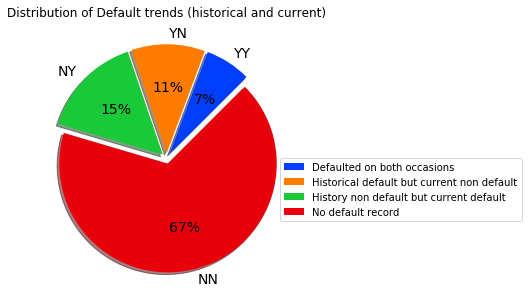

In [21]:
# Getting the number of clients that have a history of defaulting and actually defaulted on their current loan obligation #
DefaultersYY = credit_risk_train_data.query('loan_status == 1 & cb_person_default_on_file == 1')

# Getting the number of people that defaulted before but did not default on their current loan #
history_currentYN = credit_risk_train_data.query('cb_person_default_on_file == 1 & loan_status == 0')
# Getting the number of people that never defaulted before but did default on their current loan #
history_currentNY = credit_risk_train_data.query('cb_person_default_on_file == 0 & loan_status == 1')

# Getting the number of people that never defaulted before and did not default on their current loan #
history_currentNN = credit_risk_train_data.query('cb_person_default_on_file == 0 & loan_status == 0')

# Creating the pie chart for default trends#
categories = [len(DefaultersYY),len(history_currentYN),len(history_currentNY),len(history_currentNN)]

# Initializing the pie chart labels
labels = ['YY', 'YN','NY','NN']
legend_labels = ['Defaulted on both occasions','Historical default but current non default',
                'History non default but current default','No default record']

# plotting a pie chart #
explode = [0.05,0.05,0.05,0.05]
colors = sns.color_palette('bright')
plt.figure(figsize = (8,5))
plt.title('Distribution of Default trends (historical and current)',color='black')
plt.pie(categories,labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'black','fontsize':14},
        explode=explode,
        shadow = 'True',
       startangle=45) 
plt.legend(legend_labels,loc='lower left',bbox_to_anchor=(0.9,0.25))
plt.show()

Summary: <br>
From the above plot, it is evident that the number of people that had a historical default and did not default on their current loans was actually less than the number of people that had no history of defaulting but defaulted on their current loans.

### Question : Is there any relationship between a persons **age** and **loan defaulting** ?


### Getting the average age of the current defaulters and non defaulters

In [22]:
# Current defaulters
Age_defaulters = credit_risk_train_data.query('person_age >=20 & loan_status == 1')

# Current non defaulters
Age_nondefaulters = credit_risk_train_data.query('person_age >=20 & loan_status == 0')

Age_defaulters2 = Age_defaulters['person_age']
Age_nondefaulters2 = Age_nondefaulters['person_age']

#Avaerage age of defaulters
print("The Average age of the current loan defaulters is",round(Age_defaulters2.sum()/len(Age_defaulters2),2),"years.") # / Age_defaulters2.mean() #
print("The Average age of the current loan non defaulters is",round(Age_nondefaulters2.sum()/len(Age_nondefaulters2),2), 'years.')

The Average age of the current loan defaulters is 27.49 years.
The Average age of the current loan non defaulters is 27.78 years.



#### Distribution of the loan status by age

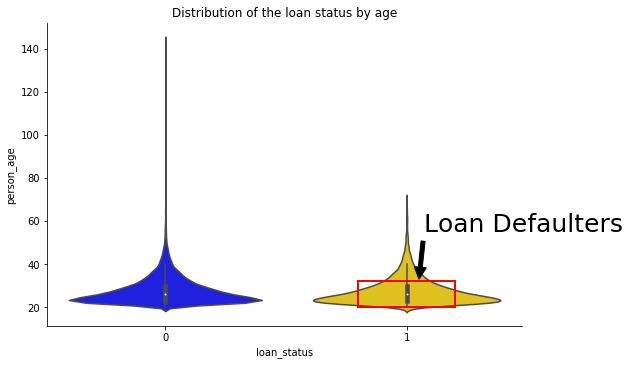

In [23]:
palette ={0 : 'blue', 1 : 'gold'}
edgecolor = 'black'



sns.catplot(x="loan_status", y="person_age",kind="violin",data=credit_risk_train_data,
            palette = palette,edgecolor=edgecolor,aspect=1.5)

plt.annotate('Loan Defaulters', size=25, color='black', xy=(1.05, 32), xytext=(1.07, 55),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0.8, 1.2], [32, 32], linewidth=2, color = 'red')
plt.plot([1.2, 1.2], [20, 32], linewidth=2, color = 'red')
plt.plot([0.8, 1.2], [20, 20], linewidth=2, color = 'red')
plt.plot([0.8, 0.8], [20, 32], linewidth=2, color = 'red')
plt.title('Distribution of the loan status by age',color='black')
plt.show();

Summary:
 * From the above analysis, it was noted that most of the loan defaulters are aged between 20 to 32 years.

## Question
### What is the main loan intent for both the current defaulters and non defaulters?

In [24]:
loan_intentDefaulters = credit_risk_train_data.query('loan_status == 1')
loan_intentNonDefaulters = credit_risk_train_data.query('loan_status == 0')

loan_intentDefaulters2 = loan_intentDefaulters['loan_intent']
loan_intentNonDefaulters2 = loan_intentNonDefaulters['loan_intent']

# Loan intent for the defaulters
loan_intentDefaulters2.value_counts()

# Loan intent for the non defaulters
loan_intentNonDefaulters2.value_counts()

1    3758
3    3380
4    3103
2    3064
5    2609
6    1902
Name: loan_intent, dtype: int64

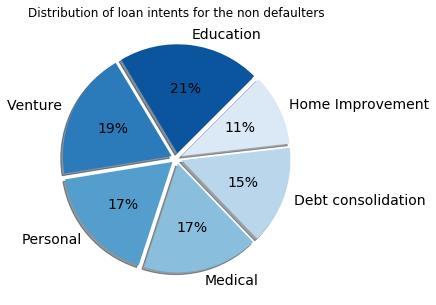

In [25]:
# Creating the pie chart for default trends#
categories = [3758,3380,3103,3064,2609,1902]

# Initializing the pie chart labels
labels = ['Education', 'Venture','Personal','Medical','Debt consolidation','Home Improvement']


# plotting a pie chart #
explode = [0.05,0.05,0.05,0.05,0.05,0.05]
colors = sns.color_palette('Blues_r')
plt.figure(figsize = (8,5))
plt.title('Distribution of loan intents for the non defaulters',color='black')
plt.pie(categories,labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'black','fontsize':14},
        explode=explode,
        shadow = 'True',
       startangle=45) 
plt.show()

Summary:
* From the above plot, the following is evident: 
     * Most of the non defaulters invest their loans to education, ventures, personal and medical needs unlike the loan defaulters who use their loans to service other debts.
     * Investing into different ventures has a positive income generation and thus enabling one to service of their loan.
     

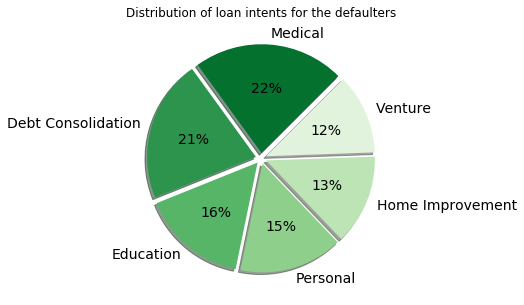

In [26]:
# Creating the pie chart for default trends#
categories = [1132,1062,789,774,676,601]

# Initializing the pie chart labels
labels = ['Medical', 'Debt Consolidation','Education','Personal','Home Improvement','Venture']


# plotting a pie chart #
explode = [0.05,0.05,0.05,0.05,0.05,0.05]
colors = sns.color_palette('Greens_r')
plt.figure(figsize = (8,5))
plt.title('Distribution of loan intents for the defaulters',color='black')
plt.pie(categories,labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'black','fontsize':14},
        explode=explode,
        shadow = 'True',
       startangle=45) 
plt.show()

Summary:
   * It is evident that most of the loan defaulters do not invest the borrowed loans but rather use them for either medical (22%) or debt consolidation(21%)

## Average income for the defaulters and non defaulters

In [27]:
income_defaulters= credit_risk_train_data.query('loan_status == 1')
income_noneDefaulters = credit_risk_train_data.query('loan_status == 0')

income_defaulters2 = income_defaulters['person_income']
income_noneDefaulters2 = income_noneDefaulters['person_income']

print('The average annual income for the defaulters is', round(income_defaulters2.sum()/len(income_defaulters2),2))
print('The average annual income for the non defaulters is',round(income_noneDefaulters2.sum()/len(income_noneDefaulters2),2))
print('The annual average income difference between the non defaulters and defaulters is',round(income_noneDefaulters2.sum()/len(income_noneDefaulters2)-income_defaulters2.sum()/len(income_defaulters2),2) )

The average annual income for the defaulters is 49139.01
The average annual income for the non defaulters is 70820.12
The annual average income difference between the non defaulters and defaulters is 21681.11


### Distribution of the loan status by Income

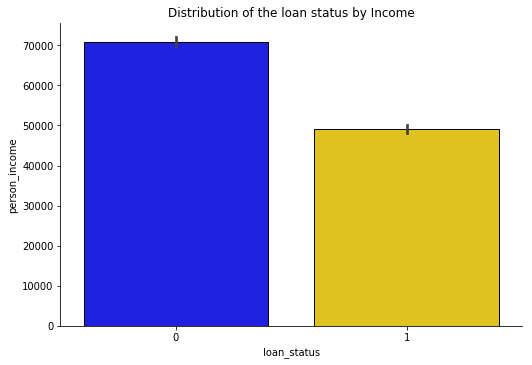

In [28]:
palette ={0 : 'blue', 1 : 'gold'}
edgecolor = 'black'



sns.catplot(x="loan_status", y="person_income",kind="bar",data=credit_risk_train_data,
            palette = palette,edgecolor=edgecolor,aspect=1.5)


plt.title('Distribution of the loan status by Income',color='black')
plt.show();

Summary:
* Most of the defaulters are low income earners

#### Distribution of the loan status by default history

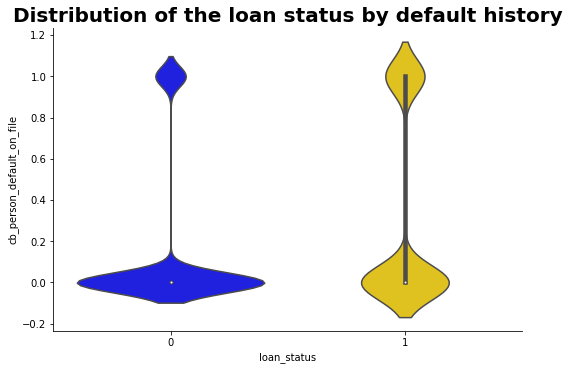

In [29]:
palette ={0 : 'blue', 1 : 'gold'}
edgecolor = 'black'



sns.catplot(x="loan_status", y="cb_person_default_on_file",kind="violin",data=credit_risk_train_data,
            palette = palette,edgecolor=edgecolor,aspect=1.5)


plt.title('Distribution of the loan status by default history',color='black',fontsize=20,weight='bold')
plt.show();

Summary:
* Most defaulters also have a history of defaulting.

#### Distribution of the loan amount by income

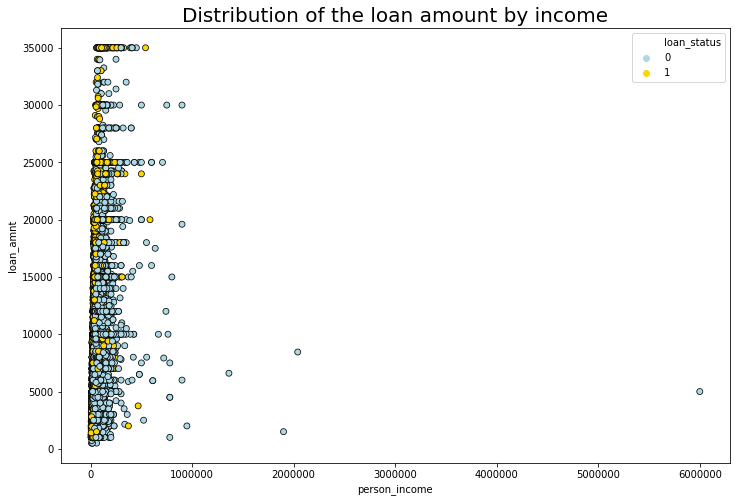

In [30]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = credit_risk_train_data['person_income'], y = credit_risk_train_data['loan_amnt'], hue = "loan_status",
                    data = credit_risk_train_data, palette = palette, edgecolor=edgecolor)


plt.title('Distribution of the loan amount by income',color='black',fontsize=20)
plt.show()

Summary:
* Most of the loan takers as seen from the above plot have relatively low salaries.
* Most of the defaulters also, have high loan amounts but low incomes

## Checking on the data distribution

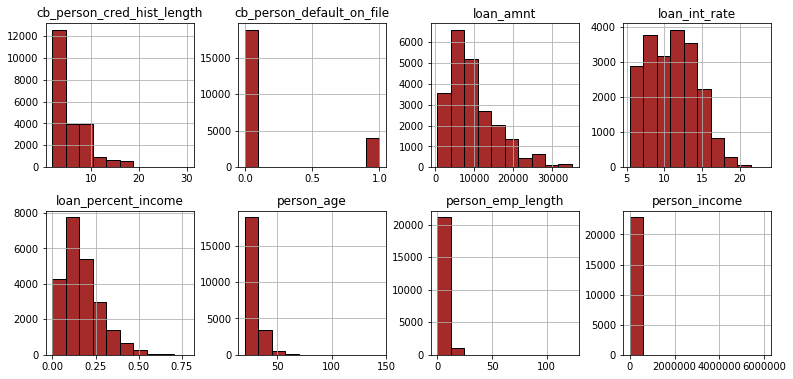

In [31]:
credit_risk_train_data.hist(sharex = False,layout = (4,4),figsize = (13,13),color = "brown", ec="black");

## Summary     
 * The customers have an employment length of 0 to 25 years.
 * Most of the clients are aged between 20 to 75 years
 * Most of the clients are non-defaulters.
 

### Checking for outliers in the dataset

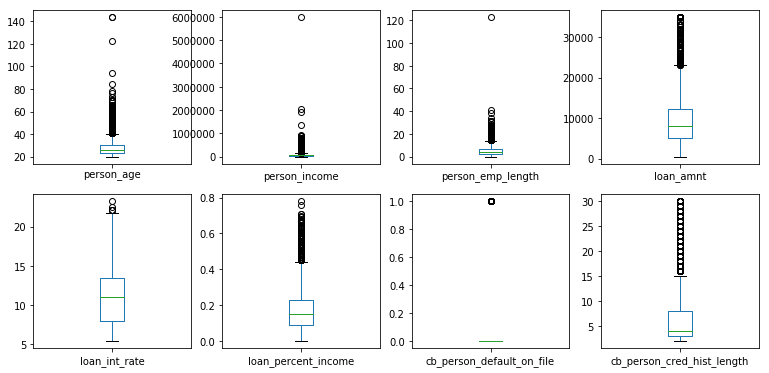

In [32]:
credit_risk_train_data.plot(kind='box',layout=(4,4),subplots=True, sharex=False, sharey=False,figsize = (13,13));

Summary:
  * There was the presence of outliers more so in the variables of personal income, age and persons employment length in years.
  * However, based on the type of the dataset, the outliers are treated by scaling the date to a range of 0 and 1 during modeling to avoid loss of information

### Univariate analysis: Target variable (loan Status)

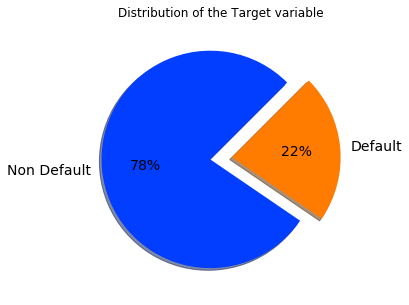

In [33]:
# Getting the target variable from the dataset #
loan_status= credit_risk_train_data['loan_status']

# Value count #
loan_status.value_counts()

# Creating the pie chart slices #
categories = [17816,5034]

# Initializing the pie chart labels
labels = ['Non Default', 'Default']

# plotting a pie chart #
explode = [0.1,0.1]
colors = sns.color_palette('bright')
plt.figure(figsize = (8,5))
plt.title('Distribution of the Target variable',color='black')
plt.pie(categories,labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'black','fontsize':14},
        explode=explode,
        shadow = 'True',
       startangle=45) 
plt.show()

### 22% of the company customers are actual loan defaulters.

### seggregating variables into groups

In [34]:
customer_details = ['person_age','person_income','person_emp_length','cb_person_cred_hist_length']
loan_details = ['loan_amnt','loan_int_rate','loan_percent_income']

### Analysing the numerical univariate

In [35]:
# custom function for easy and efficient analysis of numerical univariate

def Analyse_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

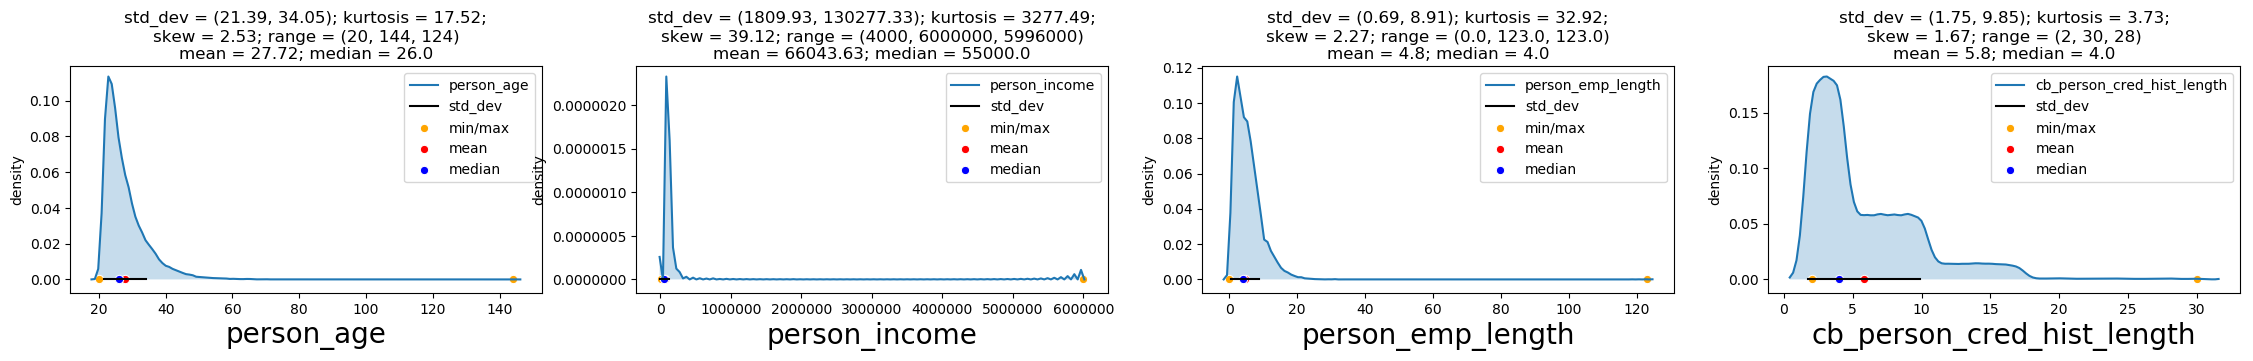

In [36]:
Analyse_numeric(credit_risk_train_data,customer_details)

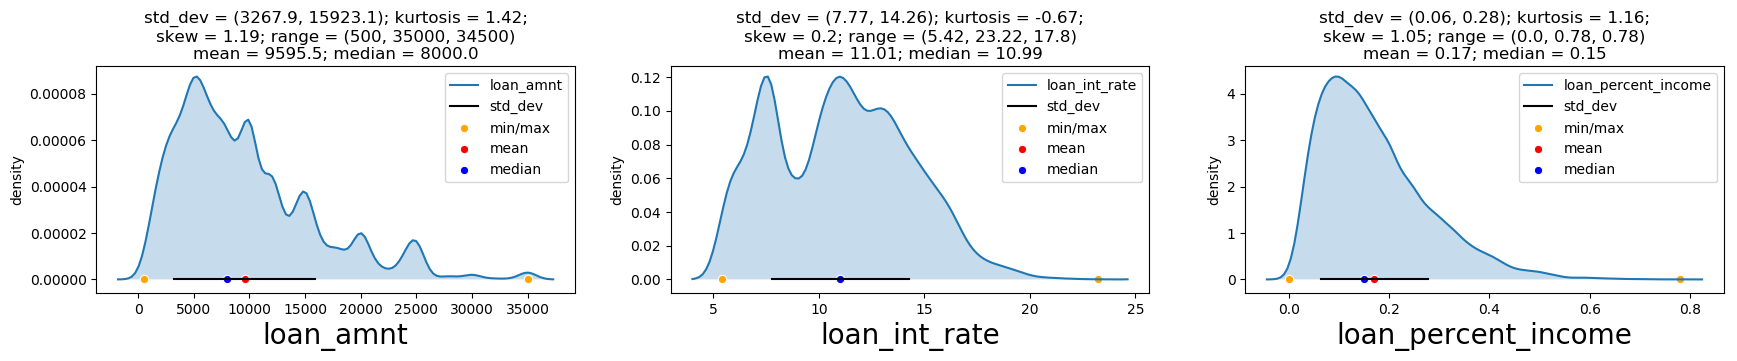

In [37]:
Analyse_numeric(credit_risk_train_data,loan_details)

### Analyisng the categorical variables

In [38]:
credit_risk_train_data['cb_person_default_on_file'] = credit_risk_train_data['cb_person_default_on_file'].astype('category')
credit_risk_train_data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

person_home_ownership        category
loan_intent                  category
loan_grade                   category
loan_status                  category
cb_person_default_on_file    category
dtype: object

**Grouping Varibales**
* **Customer information:** Home ownership and default history
* **Loan information:** Loan intent, loan grade and loan status

In [39]:
customer_info = ['person_home_ownership','cb_person_default_on_file']
loan_info = ['loan_intent','loan_grade']

In [40]:
# Custom function for easy visualisation of Categorical Variables
def Analyse_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)
  

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,palette ='bright')
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

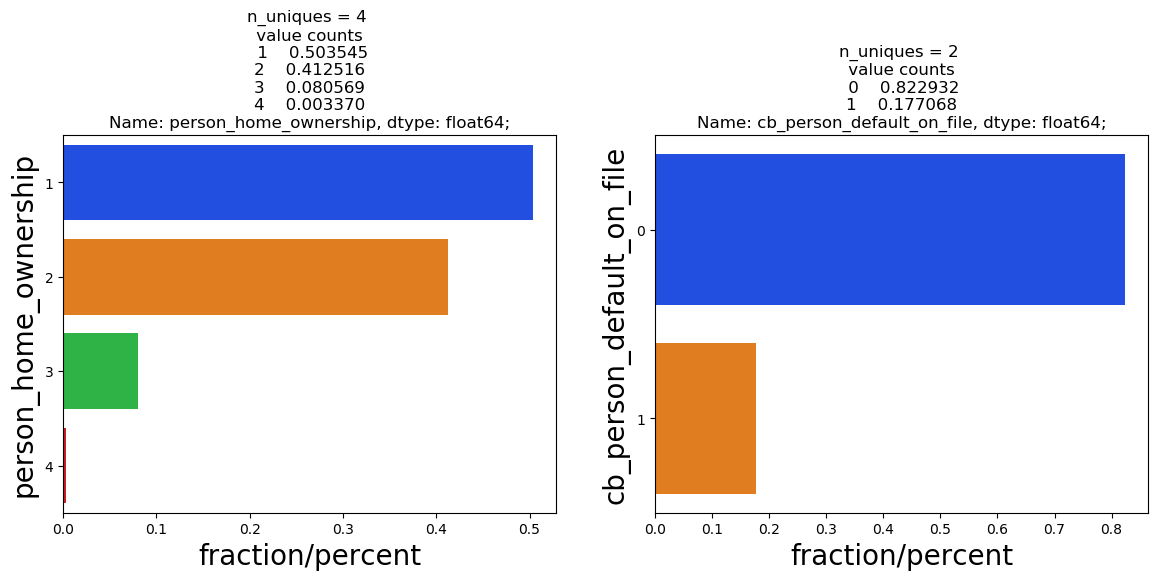

In [41]:
Analyse_category(credit_risk_train_data,customer_info)

Key: 
   * Home ownership: 1=Rent, 2= Mortgage, 3=Own, 4=Other
   * History of default:0= No, 1=Yes
   
**Summary**
* Home ownership
  * Majority of the clients reside in rentals.
  * There are few home owners and a relatively high number of clients with mortgages.

* Default history:
  *  Majority of the clients have a good credit record as they havent defaulted on a loan before.

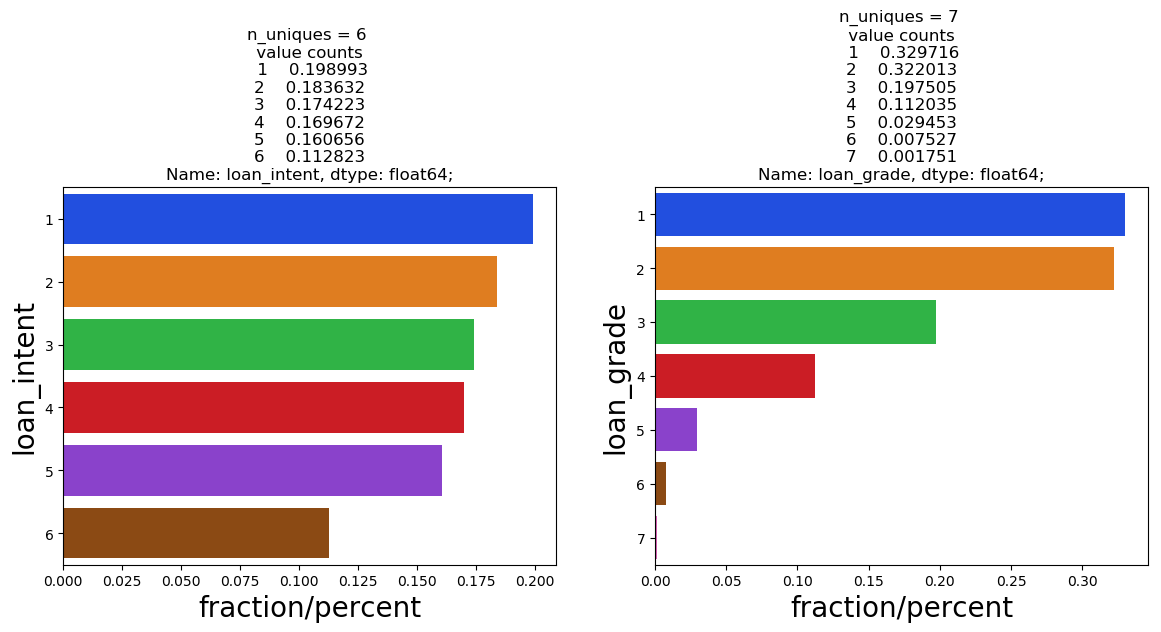

In [42]:
Analyse_category(credit_risk_train_data,loan_info)

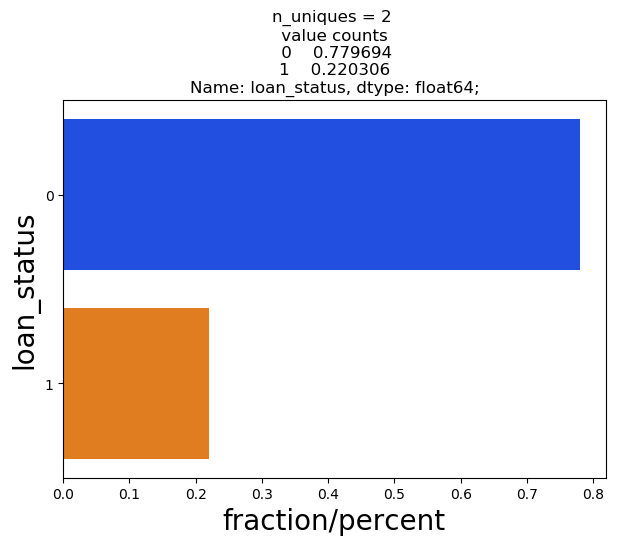

In [44]:
Analyse_category(credit_risk_train_data,['loan_status'])

In [43]:
# Converting the categorical variables to integers #

credit_risk_train_data['person_home_ownership'] = credit_risk_train_data['person_home_ownership'].astype('int64')
credit_risk_train_data['loan_intent'] = credit_risk_train_data['loan_intent'].astype('int64')
credit_risk_train_data['loan_grade'] = credit_risk_train_data['loan_grade'].astype('int64')
credit_risk_train_data['cb_person_default_on_file'] = credit_risk_train_data['cb_person_default_on_file'].astype('int64')

credit_risk_train_data.dtypes[credit_risk_train_data.dtypes == 'int64']

person_age                    int64
person_income                 int64
person_home_ownership         int64
loan_intent                   int64
loan_grade                    int64
loan_amnt                     int64
cb_person_default_on_file     int64
cb_person_cred_hist_length    int64
dtype: object

## <font color='red'>Data Cleaning </font>
### Checking for Missing values
#### Calculating the percentages of missing values for every variable in the training dataset

In [44]:
# Checking for the missing values #
credit_risk_train_data.isna().sum()

# Getting total data entries #
credit_risk_train_data.shape[0]

# Calculating the percentage of missing values #
(credit_risk_train_data.isna().sum())/(credit_risk_train_data.shape[0])*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.682713
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.396061
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

#### <font color='brown'> Each variable apart from Employment length and Interest rate has 0% missing values.</font> <br> <br> These numbers are shown in the following missing value graph.

In [45]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = 'brown',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & percentage)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
missing_plot(credit_risk_train_data, 'loan_status')

#### Calculating the percentages of missing values for every variable in the testing dataset

In [46]:
test_data.isna().sum()/(test_data.shape[0])*100

person_age                      0.000000
person_income                   0.000000
person_home_ownership           0.000000
person_emp_length               2.897955
loan_intent                     0.000000
loan_grade                      0.000000
loan_amnt                       0.000000
loan_int_rate                   9.957867
loan_percent_income             0.000000
cb_person_default_on_file       0.000000
cb_person_cred_hist_length      0.000000
loan_status                   100.000000
dtype: float64

Summary:
 * All the variables have 0% missing values apart from employment length, loan interest rate and loan status.
 * It is good to note that loan status is the variable to be predicted and hence has no values.
 * The loan status column is to be dropped from the dataset.

##### Dropping the loan status column from the dataset

In [47]:
test_data=test_data.drop(['loan_status'], axis=1)

### Treating the missing values in train dataset using Backward Fill

In [48]:
credit_risk_train_data=credit_risk_train_data.fillna(method="bfill")

##### Checking if there are missing values remaining in training set

In [49]:
(credit_risk_train_data.isna().sum())/(credit_risk_train_data.shape[0])*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

Summary:
   * The missing values are treated as all variables have 0% missing values

### Treating the missing values in test dataset using Backward Fill

In [50]:
test_data=test_data.fillna(method='bfill')

##### Checking if there are missing values remaining in test set

In [51]:
test_data.isna().sum()/(test_data.shape[0])*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

Summary:
   * The missing values are treated as all variables have 0% missing values

# <font color='red'>2. Modeling </font>

## Scaling the datasets

### 1.Training set

In [52]:
# importing the minimum maximum scaler scaler to scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
# Creating a copy of the dataset
credit_risk_train_data1 = credit_risk_train_data.copy()

In [54]:
credit_risk_train_data1[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']] = scaler.fit_transform(credit_risk_train_data1[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']])
credit_risk_train_data1.head()

C:\Users\user\.conda\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



person_age  person_income  person_home_ownership  person_emp_length  \
0    0.016129       0.009173               0.000000           1.000000   
1    0.008065       0.000934               0.666667           0.040650   
2    0.024194       0.010257               0.000000           0.032520   
3    0.008065       0.000984               0.666667           0.016260   
4    0.048387       0.012191               0.000000           0.065041   

   loan_intent  loan_grade  loan_amnt  loan_int_rate loan_status  \
0          0.6    0.500000   1.000000       0.595506           1   
1          0.0    0.166667   0.014493       0.321348           0   
2          0.2    0.333333   1.000000       0.551124           1   
3          0.4    0.000000   0.057971       0.096629           1   
4          0.0    0.166667   1.000000       0.393258           1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0             0.756410                        1.0                    0.035714  
1             0.128205                        0.0                    0.000000  
2             0.679487                        0.0                    0.000000  
3             0.320513                        0.0                    0.000000  
4             0.576923                        0.0                    0.035714

### Test set

In [55]:
# Creating a copy of the dataset
test_data1 = test_data.copy()

In [56]:
test_data1.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0          25           9600                      2                1.0   
1          24          54400                      1                8.0   
2          24          78956                      1                5.0   
3          26         108160                      1                4.0   
4          23          92111                      1                7.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            2           3       5500          12.87                 0.57   
1            2           3      35000          14.27                 0.55   
2            2           2      35000          11.11                 0.44   
3            1           5      35000          18.39                 0.32   
4            2           6      35000          20.25                 0.32   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                          0                           3  
1                          1                           4  
2                          0                           4  
3                          0                           4  
4                          0                           4

In [57]:
test_data1[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']] = scaler.fit_transform(test_data1[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']])
test_data1.head()

C:\Users\user\.conda\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



person_age  person_income  person_home_ownership  person_emp_length  \
0    0.040323       0.003105               0.333333           0.008130   
1    0.032258       0.028303               0.000000           0.065041   
2    0.032258       0.042114               0.000000           0.040650   
3    0.048387       0.058540               0.000000           0.032520   
4    0.024194       0.049513               0.000000           0.056911   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0          0.2    0.333333   0.144928       0.456495             0.686747   
1          0.2    0.333333   1.000000       0.542279             0.662651   
2          0.2    0.166667   1.000000       0.348652             0.530120   
3          0.0    0.666667   1.000000       0.794730             0.385542   
4          0.2    0.833333   1.000000       0.908701             0.385542   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                        0.0                    0.035714  
1                        1.0                    0.071429  
2                        0.0                    0.071429  
3                        0.0                    0.071429  
4                        0.0                    0.071429

In [58]:
from sklearn.model_selection import train_test_split

#### Dividing the train set to get a validation set.

In [61]:
x_train, x_val, y_train,y_val = train_test_split(credit_risk_train_data1[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file',
                                                              'cb_person_cred_hist_length']],credit_risk_train_data1['loan_status'],test_size=0.20,random_state=21)
print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_val.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_val.shape))

Shape of Training Xs:(18280, 11)
Shape of Test Xs:(4570, 11)
Shape of Training y:(18280,)
Shape of Test y:(4570,)


## Importing tensorflow and keras

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import statsmodels.api as sm

### Building the Neural network model

In [63]:
model= Sequential()
model.add(Dense(16, input_shape=(11,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


Summary:
   * The neural network model used in this study has 3 layers.
   * The 1st layer has 16 nodes and the input shape, which is the number of variables is 11. The activation layer used in the 1st layer is the rectified linear unit (Relu)
   * On the 2nd layer, 8 nodes are used and the activation function is still Relu.
   * The last layer which is the output layer, has only one node. The activation function used in this last layer is the sigmoid function which ensures that the model output is between 0 and 1

### Compiling the model

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Summary:
   * The following parameters are used to compile the model.
       * Loss function: Being a classification problem, where the client is predicted as either a defaulter or a non-defaulter, the loss function adopted for this study is cross entropy.
       * Optimizer: To ensure that the neural network model performs efficiently, the adaptive movement estimation **(ADAM)** is used. This is basically due to its ability to tune automatically.
       * Metric: As this is a classification problem, the metric that is collected and reported is accuracy

### Training the model

In [65]:
model.fit(x_train,y_train,epochs=200, batch_size=32)

Epoch 1/200
572/572 [==============================] - 2s 1ms/step - loss: 0.4689 - accuracy: 0.7994
Epoch 2/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8586
Epoch 3/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3493 - accuracy: 0.8658
Epoch 4/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8695
Epoch 5/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3364 - accuracy: 0.8733
Epoch 6/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3322 - accuracy: 0.8730
Epoch 7/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3285 - accuracy: 0.8732
Epoch 8/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3260 - accuracy: 0.8741
Epoch 9/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3227 - accuracy: 0.8746
Epoch 10/200
572/572 [==============================] - 1s 1ms/step - loss: 0.3197 - accura

572/572 [==============================] - 1s 2ms/step - loss: 0.2759 - accuracy: 0.8985
Epoch 81/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8997
Epoch 82/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2737 - accuracy: 0.9005
Epoch 83/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2731 - accuracy: 0.9015
Epoch 84/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2733 - accuracy: 0.9015
Epoch 85/200
572/572 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.9010
Epoch 86/200
572/572 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9017
Epoch 87/200
572/572 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.9009
Epoch 88/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2711 - accuracy: 0.9016: 0s -
Epoch 89/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2706 - accu

572/572 [==============================] - 1s 1ms/step - loss: 0.2535 - accuracy: 0.9065
Epoch 160/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.9094
Epoch 161/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2519 - accuracy: 0.9082
Epoch 162/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.9088
Epoch 163/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2523 - accuracy: 0.9082
Epoch 164/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2520 - accuracy: 0.9083
Epoch 165/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.9087
Epoch 166/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2505 - accuracy: 0.9092
Epoch 167/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 0.9083
Epoch 168/200
572/572 [==============================] - 1s 1ms/step - loss: 0.2510 - a

Summary:
* The neural network model is trained using the training dataset.
* The following parameters are used:
    * Epoch: The epoch used, which is the number of iterations during training is 500.
    * The batch sized adopted in this study is 32.

### Evaluating the model

In [66]:
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))

572/572 [==============================] - 1s 1ms/step - loss: 0.2480 - accuracy: 0.9088
Accuracy: 90.88


Summary
 * On evaluating the model, an accuracy of **90.88%** was recorded

#### Using the validation set

In [92]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

### Generating the confusion matrix

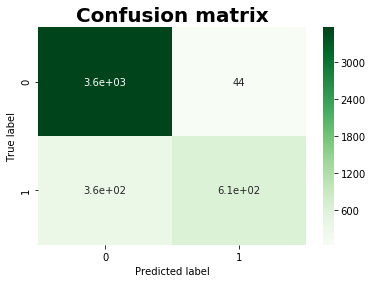

In [76]:
confusionmatrix=confusion_matrix(y_val, y_pred)
ax = sns.heatmap(confusionmatrix, annot=True, cmap='Greens')
plt.title('Confusion matrix',color='black',fontsize=20,weight='bold')
plt.ylabel('True label')
plt.xlabel('Predicted label');

### Performace metrices

#### Precision: Precision refers to the number of true positives divided by the total number of positive predictions

In [84]:
precision = precision_score(y_val, y_pred, average=None)
print('The model precision is:',round(precision[0] *100 ,2))

The model precision is: 90.93


#### Recall: how many of the true positives were recalled (found), i.e. how many of the correct hits were also found

In [79]:
recall = recall_score(y_val, y_pred, average=None)
print('The model recall is:',round(recall[0]*100,2))

The model recall is: 98.78


### F1 score
#### F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.

In [80]:
f1_scoreresult=f1_score(y_val, y_pred, average=None)[0] * 100
print('The F1 score is:',round(f1_scoreresult,2))

The F1 score is: 94.69


#### Testing F1 score using the manual formula

In [81]:
# testing the f1 score
f1score= (2*precision[0]*recall[0])/(recall[0]+precision[0])
round(f1score*100,2)

94.69

## <font color='red'> Predicting loan status using the test dataset 

In [85]:
predicted_loan_status = (model.predict(test_data1) > 0.5).astype(int)

### Adding the predicted loan class to the end of the test dataset

In [86]:
test_data['loan_status'] = predicted_loan_status 

# Converting the predicted variable from an integer to a categirical variable
test_data['loan_status'] = test_data['loan_status'].astype('category')

#### Viewing the first 5 observations for the test set

In [87]:
test_data.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0          25           9600                      2                1.0   
1          24          54400                      1                8.0   
2          24          78956                      1                5.0   
3          26         108160                      1                4.0   
4          23          92111                      1                7.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            2           3       5500          12.87                 0.57   
1            2           3      35000          14.27                 0.55   
2            2           2      35000          11.11                 0.44   
3            1           5      35000          18.39                 0.32   
4            2           6      35000          20.25                 0.32   

   cb_person_default_on_file  cb_person_cred_hist_length loan_status  
0                          0                           3           1  
1                          1                           4           1  
2                          0                           4           1  
3                          0                           4           1  
4                          0                           4           1

### Saving the new test set containing the predicted loan status column as CSV

In [88]:
test_data.to_csv('New_Test_Data.csv')

## Getting the distribution of the predicted loan status in the test set

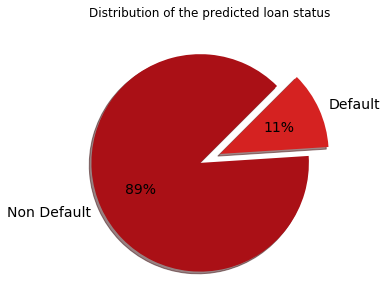

In [91]:
# Getting the target variable from the dataset #
loan_status= test_data['loan_status']

# Value count #
loan_status.value_counts()

# Creating the pie chart slices #
categories = [8614,1117]

# Initializing the pie chart labels
labels = ['Non Default', 'Default']

# plotting a pie chart #
explode = [0.1,0.1]
colors = sns.color_palette('Reds_r')
plt.figure(figsize = (8,5))
plt.title('Distribution of the predicted loan status',color='black')
plt.pie(categories,labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'black','fontsize':14},
        explode=explode,
        shadow = 'True',
       startangle=45) 
plt.show()

Summary:
 * From the above pie chart, it was evident that the model predicted that **89%** of the clients would not default on their loan and **11%** of the clients would default.

# <font color='red'> <center>3. Conclusion </center> </font>
From the above analysis, the following observations were made: <br>
#### <u>  Exploratory Data Analysis</u>
* It was observed that most of the customers do satisfy their loan obligations given that 78% of the customers were non defaulters and only 22% were defaulters.
* It was also noted that most of the loan defaulters are young people aged between 20 and 32 years.
* Also evident was that most of the defaulters are low income earners.
* Also, when it comes to loan grades, it was observed that the most accessed loan grade was A and the least accessed grade was G. This pops up a question of concern on why most clients opt for other loan grades other than G
* From the distribution of clients by their loan status against their historical loan obligations, the data indicated that a good number of defaulters also had a history of defaulting on their loan obligations. The data did also show that some people with a history of defaulting did meet their loan obligations and many that did not have any defaulting history did default on their current loan obligations. 
* It was further observed that most of the loan takers have relatively low incomes. It was further noted that most of the defaulters had relatively high loan amounts but low incomes. On the same note, it was also evident that even those with higher incomes did default on their loans.

#### <u>Modeling</u>
* To predict the loan status using the unseen test dataset, this study adopted a neural network method from keras which is an interface for Tensorflow.
* To build the model, the following were used:
  * Input layer: The input layer comprised of 11 variables from the training dataset excluding the target variable. 16 nodes were used in this layer.
  * Processing layer: In this layer, 8 nodes were used.
  * Output layer: This layer had one output. To achieve this, the neural network makes use of the softmax variables to classify predicted probabilities where the class with the highest probability is given as output. The predicted values in this case are those of loan status for the unseen test dataset.
    * In the 1st and 2nd layers, the action function used is the rectified linear unit(Relu). This activation function is unique as it only outputs values that are between 0 and 1 and omits any value that is less than 0. It is good to note that this study makes use of a minmax data scaler which scales the data to values between 0 and 1 hence ensuring that every value that goes through the relu activation function is given directly as an output.
    * On the last layer, a sigmoid activation function is used. This is because the function ensures that the model output is between 0 and 1.
  * #### <u>Compiling the mode </u> 
      * To compile the model, the following parameters are used: <br> 
         * Loss function: The loss function employed in this study is cross entropy.
         * Optimizer: To ensure that the model performs well, the optimizer used is the Adaptive Movement Estimator.
         * Metric: Since this is a classification problem, the accuracy of the model is tracked and recorded.
         
 * ### Results
     * Since the data set is imbalanced, the harmonic mean (F-1 score) of precision and recall is used.
     * After evaluating the model, an F-1 score of **94.69%** was recorded.
    
     * From the predicted loan status variable, **89%** of the predicted class were non defaulters and **11%** defaulters.
     * This is as shown in the pie chart below:

Based on the above results, it was concluded that the neural network model was best suited for this sort of data. The predicted variable and its distribution also indicate that the model was able to learn the features and patters of the dataset hence the significant evaluated accuracy.

# <font color='red'> <center>4. Recommendations </center> </font>
From the data analysis, the following points were evident: <br>
1. History vs Current: Not all people that had a historical record for defaukting actually defaulted on their current loan obligations. Actually, this is the opposite as most of the people that defaulted on their current loans had no historical default record being a total of 15% of the total applicants. Historical default cannot therefore be a main restrictor when it comes to loan approvals which if implemented would increase the percentage of successful loan applicants.
2. Age: From the dataset, it was seen that the average age for the defaulters was 27.49 and that of the non defaulters was 27.78. This doesnt show much of a difference and therefore age should not be used as constraint to a loan application.
3. Loan Intent: 
 * it was seen that, 21% of the loan defaulters applied for their loans with the aim of consolidating other debts with only 12%  providing venture investiment reasons. 
 * On the other hand, clients whose loan status was non default, applied for the loans with better reasons. 21% of them provided education reasons and 19% providing venture investnment reasons.
 * It is therefore adamant that based on the above evidenced analysis, applicants should be provided with sensitization information on how best their loans would benefit them before applying to enable them make better and informed decision so as to ensure that their applications are successful.
4. Income:  
 * The data also showed that the clients whose status was default, had a low average income at 49,1390.01 compared to those whose status was non default at 70,820.12.
 * This then calls for a metholodical implementation in that clients with low incomes would receive lower loan limits and vice versa.
 
**If implemented, the above four reasons would lead to a drastic increase in the percentage of successful loan applications.**

<br>

# <font color='red'> <center>Samuel Muriithi Wanjiru  </center> </font>
<font><center> samuelmwanjiru06@gmail.com </center></font>